In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()

## Data

In [2]:
npz = np.load("FIFA19_data_train.npz")
train_inputs, train_targets = npz["inputs"].astype(np.float), npz["targets"].astype(np.float)

npz = np.load("FIFA19_data_validation.npz")
validation_inputs, validation_targets = npz["inputs"].astype(np.float), npz["targets"].astype(np.float)

npz = np.load("FIFA19_data_test.npz")
test_inputs, test_targets = npz["inputs"].astype(np.float), npz["targets"].astype(float)

## Model

In [3]:
input_size = 328
output_size = 1

hidden_layer_size = 10

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation="tanh"),
    tf.keras.layers.Dense(hidden_layer_size, activation="tanh"),
    tf.keras.layers.Dense(output_size, activation="linear"),
])

#amsgrad = tf.keras.optimizers.Adam(amsgrad=True)

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])

batch_size = 100
max_epochs = 200

early_stopping = tf.keras.callbacks.EarlyStopping(patience=4)

hist = model.fit(train_inputs,
          train_targets,
          batch_size = batch_size,
          epochs = max_epochs,
          callbacks = [early_stopping],
          validation_data = (validation_inputs, validation_targets),
          verbose = 2
          )

Train on 14512 samples, validate on 1814 samples
Epoch 1/200
14512/14512 - 1s - loss: 4884.8673 - mean_absolute_error: 69.6178 - val_loss: 4677.3564 - val_mean_absolute_error: 68.1111
Epoch 2/200
14512/14512 - 0s - loss: 4553.5865 - mean_absolute_error: 67.1514 - val_loss: 4443.0365 - val_mean_absolute_error: 66.3250
Epoch 3/200
14512/14512 - 0s - loss: 4342.3010 - mean_absolute_error: 65.5158 - val_loss: 4251.4726 - val_mean_absolute_error: 64.8192
Epoch 4/200
14512/14512 - 0s - loss: 4159.7716 - mean_absolute_error: 64.0573 - val_loss: 4075.0085 - val_mean_absolute_error: 63.3957
Epoch 5/200
14512/14512 - 0s - loss: 3974.7742 - mean_absolute_error: 62.5633 - val_loss: 3895.1984 - val_mean_absolute_error: 61.9247
Epoch 6/200
14512/14512 - 0s - loss: 3808.5719 - mean_absolute_error: 61.1655 - val_loss: 3737.1923 - val_mean_absolute_error: 60.5721
Epoch 7/200
14512/14512 - 0s - loss: 3654.9295 - mean_absolute_error: 59.8288 - val_loss: 3588.3815 - val_mean_absolute_error: 59.2588
Epoch 

Epoch 62/200
14512/14512 - 0s - loss: 18.2008 - mean_absolute_error: 2.9430 - val_loss: 17.4195 - val_mean_absolute_error: 2.9242
Epoch 63/200
14512/14512 - 0s - loss: 16.6827 - mean_absolute_error: 2.8049 - val_loss: 15.9947 - val_mean_absolute_error: 2.7946
Epoch 64/200
14512/14512 - 0s - loss: 15.2934 - mean_absolute_error: 2.6691 - val_loss: 14.9031 - val_mean_absolute_error: 2.6394
Epoch 65/200
14512/14512 - 0s - loss: 14.1713 - mean_absolute_error: 2.5439 - val_loss: 13.9179 - val_mean_absolute_error: 2.5689
Epoch 66/200
14512/14512 - 0s - loss: 13.0567 - mean_absolute_error: 2.4398 - val_loss: 13.0031 - val_mean_absolute_error: 2.4642
Epoch 67/200
14512/14512 - 0s - loss: 12.2037 - mean_absolute_error: 2.3614 - val_loss: 12.3885 - val_mean_absolute_error: 2.3895
Epoch 68/200
14512/14512 - 0s - loss: 11.5557 - mean_absolute_error: 2.2947 - val_loss: 11.2653 - val_mean_absolute_error: 2.2872
Epoch 69/200
14512/14512 - 0s - loss: 10.7902 - mean_absolute_error: 2.2086 - val_loss: 10

Text(0, 0.5, 'Loss')

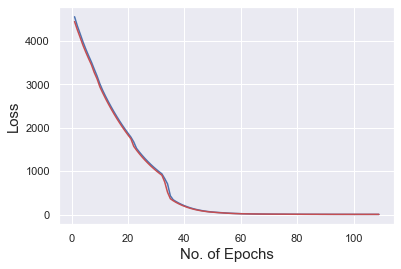

In [4]:
val_loss = hist.history["val_loss"][1:]
loss = hist.history["loss"][1:]
epochs = range(1, len(val_loss)+1)

plt.plot(epochs, loss, color = "b")
plt.plot(epochs, val_loss, color = "r")
plt.xlabel("No. of Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)

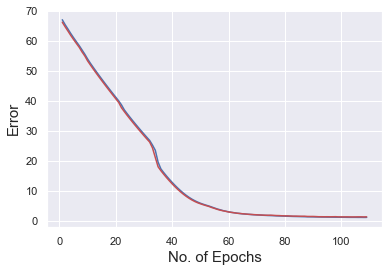

In [5]:
val_error = hist.history["val_mean_absolute_error"][1:]
training_error = hist.history["mean_absolute_error"][1:]
epochs = range(1, len(val_error)+1)

plt.plot(epochs, training_error, color = "b")
plt.plot(epochs, val_error, color = "r")
#plt.yticks(np.arange(0, max(training_error), 1))
#plt.xticks(np.arange(0, max(epochs)+1, 5))
plt.xlabel("No. of Epochs", fontsize=15)
plt.ylabel("Error", fontsize=15)
plt.show()

## Evaluating the model

In [6]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

1814/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [7]:
print ("Test Loss: {:.2f}, Expected Deviation for Prediction: {:.2f}".format(test_loss, test_accuracy))

Test Loss: 4.14, Expected Deviation for Prediction: 1.45
